# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# PIPELINE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib



In [2]:
df= pd.read_csv('../data/processed/datos_normalizados.csv', delimiter=',')

df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,failure_cycle,is_failure_cycle,RUL,label1,label2
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.333333,0.0,0.0,0.713178,0.724662,112,0,191.0,0,0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.333333,0.0,0.0,0.666667,0.731014,112,0,190.0,0,0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.166667,0.0,0.0,0.627907,0.621375,112,0,189.0,0,0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.333333,0.0,0.0,0.573643,0.662386,112,0,188.0,0,0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.416667,0.0,0.0,0.589147,0.704502,112,0,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.750000,0.0,0.0,0.271318,0.109500,20,0,4.0,1,2
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.583333,0.0,0.0,0.124031,0.366197,20,0,3.0,1,2
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.833333,0.0,0.0,0.232558,0.053991,20,0,2.0,1,2
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.583333,0.0,0.0,0.116279,0.234466,20,0,1.0,1,2


# BALANCEO DE LOS DATOS POSIBLE TARGET

In [3]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

In [4]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5','s6','s10','s16', 's18', 's19', 'failure_cycle','is_failure_cycle']
df_red = df.drop(columns=cols_a_borrar)
df_red

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [20]:
df_red['cumcount'] = df_red.groupby('id').cumcount()
df_filtered = df_red[df_red['cumcount'] >= df_red['cumcount'].max() * 0.1]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
37,1,38,0.216867,0.404622,0.291188,0.780998,0.272727,0.150498,0.250000,0.795309,0.294118,0.189235,0.349750,0.333333,0.713178,0.804474,154.0,0,0
38,1,39,0.240964,0.265315,0.311276,0.663446,0.181818,0.134748,0.160714,0.754797,0.250000,0.164465,0.342824,0.333333,0.434109,0.656863,153.0,0,0
39,1,40,0.310241,0.240680,0.329507,0.760064,0.242424,0.140223,0.285714,0.671642,0.191176,0.160440,0.205848,0.333333,0.542636,0.666529,152.0,0,0
40,1,41,0.358434,0.441901,0.353815,0.623188,0.242424,0.122319,0.142857,0.720682,0.220588,0.196821,0.431320,0.333333,0.767442,0.759735,151.0,0,0
41,1,42,0.274096,0.296926,0.322924,0.658615,0.272727,0.158530,0.380952,0.754797,0.250000,0.159666,0.341670,0.333333,0.666667,0.663905,150.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [21]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    13831
2     1600
1     1500
Name: count, dtype: int64

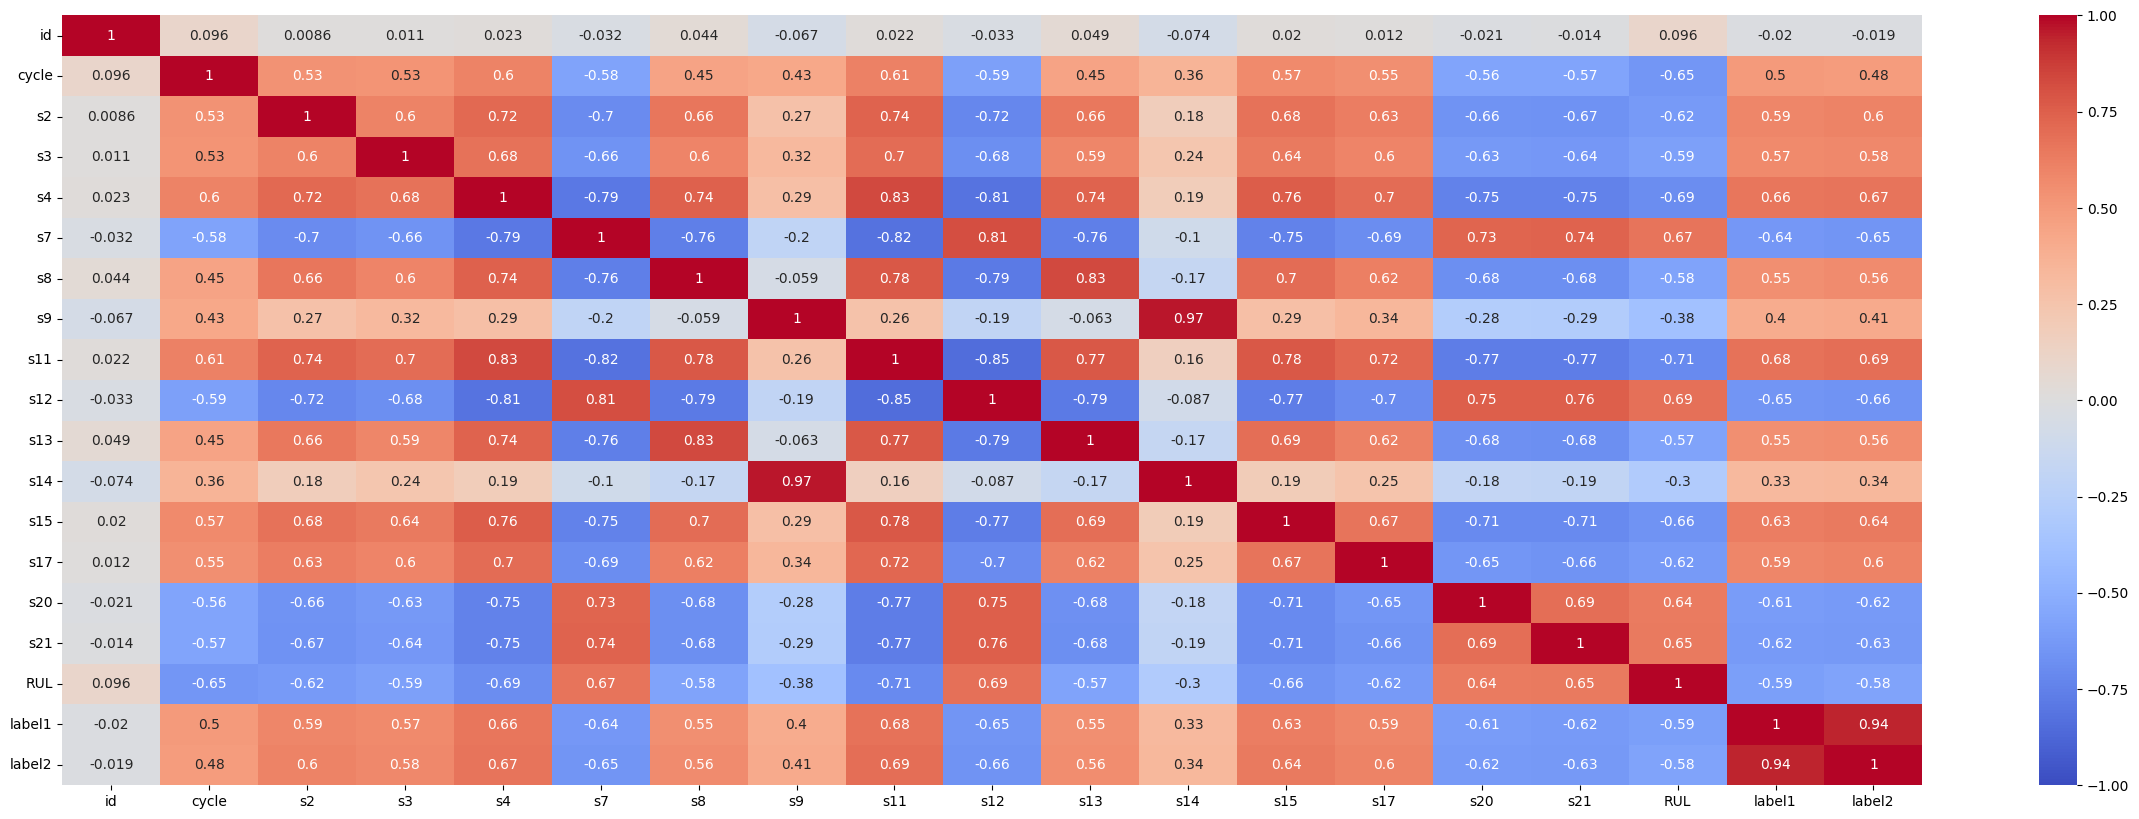

In [22]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [23]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [24]:
X

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
37,0.216867,0.404622,0.291188,0.780998,0.272727,0.150498,0.250000,0.795309,0.294118,0.189235,0.349750,0.333333,0.713178,0.804474
38,0.240964,0.265315,0.311276,0.663446,0.181818,0.134748,0.160714,0.754797,0.250000,0.164465,0.342824,0.333333,0.434109,0.656863
39,0.310241,0.240680,0.329507,0.760064,0.242424,0.140223,0.285714,0.671642,0.191176,0.160440,0.205848,0.333333,0.542636,0.666529
40,0.358434,0.441901,0.353815,0.623188,0.242424,0.122319,0.142857,0.720682,0.220588,0.196821,0.431320,0.333333,0.767442,0.759735
41,0.274096,0.296926,0.322924,0.658615,0.272727,0.158530,0.380952,0.754797,0.250000,0.159666,0.341670,0.333333,0.666667,0.663905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)

(13544, 14)
(13544,)


## Pipeline con scaler y clasificador

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

param_grid = [
    {
        'clf': [LogisticRegression( random_state=0)],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10],
        'clf__solver': ['liblinear']
    },
    {
        'clf': [RandomForestClassifier(random_state=0)],
        'clf__n_estimators': [100, 300],
        'clf__max_depth': [None, 10, 20, 30]
    },
    
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    }
]

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)
print("Mejor modelo:", grid.best_estimator_)
print(classification_report(y_test, grid.predict(X_test)))


Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=0))])
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2783
           1       0.61      0.54      0.57       282
           2       0.86      0.83      0.85       322

    accuracy                           0.93      3387
   macro avg       0.81      0.78      0.80      3387
weighted avg       0.93      0.93      0.93      3387



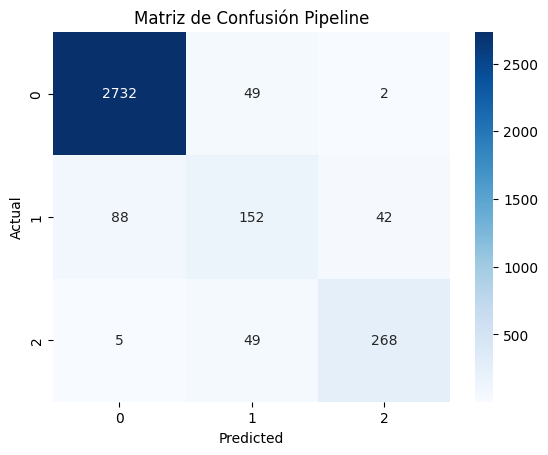

In [30]:
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión Pipeline")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





In [28]:
print(confusion_matrix(y_test, y_pred))

[[2732   49    2]
 [  88  152   42]
 [   5   49  268]]


GUARDAR EL MODELO

In [29]:
joblib.dump(grid.best_estimator_, "../models/modelo_pipeline.pkl")

['../models/modelo_pipeline.pkl']

ROC AUC (multiclass OvR): 0.979


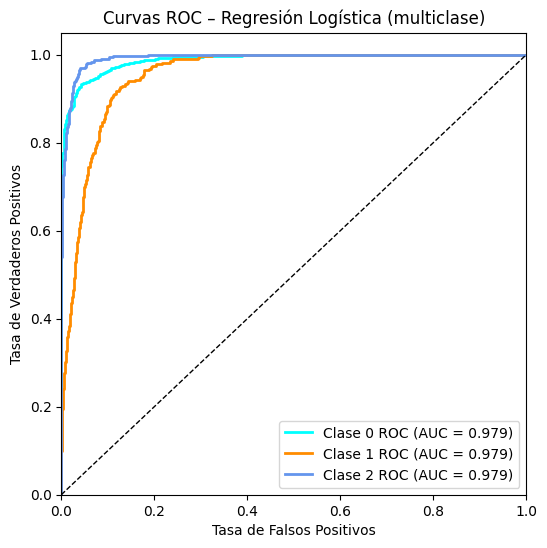

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score  


probas = grid.predict_proba(X_test)  # shape (n_samples, 3)

# ROC AUC global (One-vs-Rest) y curvas por clase
auc_score = roc_auc_score(y_test, probas, multi_class='ovr')  
print(f"ROC AUC (multiclass OvR): {auc_score:.3f}")

# Curvas individuales
fpr = dict()
tpr = dict()
n_classes = probas.shape[1]  
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probas[:, i])

# curvas ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} ROC (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC – Regresión Logística (multiclase)')
plt.legend(loc='lower right')
plt.show()
